# Handwritten Digit Classification in Pytorch

The objective here is to take hand-drawn images of the numbers 0-9  and build and train a neural network to recognize and predict the correct label for the digit displayed. The dataset we will be using is called the **MNIST** dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset:

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In this notebook our main focus is to use different utility packages provided within PyTorch (nn, autograd, optim, torchvision, torchtext, etc.) to build and train neural networks. 

## Step 1: Import MNIST Dataset  and Preprocess it

In [0]:
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn.functional as F

In [0]:
### Data Preprocessing: We need to transform the raw dataset into tensors and normalize them in a fixed range.
### The torchvision package provides a utility called transforms which can be used to combine different 
### transformations together.

transform_tasks = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

The first transformation converts the raw data into tensor variables and the second transformation performs normalization using the below operation:

x_normalized = x-mean / std

The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.

In [0]:
#--------- Load MNIST Dataset and apply transformations ---------#
mnist = MNIST("data", download=True, train=True, transform=transform_tasks)

### DataLoader: 
**Iterators** which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers. For the purpose of evaluating our model, we will partition our data into training and validation sets.

In [0]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
#--------- create training and validation split ---------#
split = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx, valid_idx = index_list[:split], index_list[split:]

In [0]:
#--------- create sampler objects using SubsetRandomSampler ---------#
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

In [0]:
#--------- create iterator objects for train and valid datasets ---------#
trainloader = DataLoader(mnist, batch_size=256, sampler=tr_sampler)
validloader = DataLoader(mnist, batch_size=256, sampler=val_sampler)

## Step 2: Defining the Neural Network
The architecture of the neural network refers to elements such as the number of layers in the network, the number of units in each layer, and how the units are connected between layers. In the inline below, add the number of units per layer in global variables. 
![alt text](https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png)

In [0]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 512)
        self.hidden2 = nn.Linear(512, 256)
        self.hidden3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 10)
  
    def forward(self, x):
        x = self.hidden1(x)
        x = F.sigmoid(x)
        x = self.hidden2(x)
        x = F.sigmoid(x)
        x = self.hidden3(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x



In [0]:
model = Model()

### Loss Function and Optimizer
Define the loss function and the optimizer using the nn and optim package:

In [0]:
from torch import optim

In [0]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

## Step 3: Training and Testing

In [12]:
import numpy as np

for epoch in range(1, 25): ## Run the model for 10 epochs
    train_loss, valid_loss = [], []
    
    ## training part 
    model.train()
    for data, target in trainloader:
        
        data = data.reshape(-1,28*28)
        optimizer.zero_grad()
        
         ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    ## evaluation part 
    model.eval()
    for data, target in validloader:
        
        data = data.reshape(-1,28*28)
        output = model(data)
        loss = loss_function(output, target)
        valid_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))
        


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 Training Loss:  2.304308307931778 Valid Loss:  2.305194027880405
Epoch: 2 Training Loss:  2.301087327460025 Valid Loss:  2.305429123817606
Epoch: 3 Training Loss:  2.2991073930517154 Valid Loss:  2.3003978779975403
Epoch: 4 Training Loss:  2.2964750122516713 Valid Loss:  2.294530011237936
Epoch: 5 Training Loss:  2.291002128986602 Valid Loss:  2.2892358404524784
Epoch: 6 Training Loss:  2.277889220004386 Valid Loss:  2.2644382639134184
Epoch: 7 Training Loss:  2.225605883496873 Valid Loss:  2.152382551355565
Epoch: 8 Training Loss:  1.906480700411695 Valid Loss:  1.5871165711829003
Epoch: 9 Training Loss:  1.42108305591218 Valid Loss:  1.288232996108684
Epoch: 10 Training Loss:  1.2119749949333516 Valid Loss:  1.0759656898518826
Epoch: 11 Training Loss:  0.9756659757583699 Valid Loss:  0.8463183070750947
Epoch: 12 Training Loss:  0.8195745745237838 Valid Loss:  0.7442084309902597
Epoch: 13 Training Loss:  0.7481442994259774 Valid Loss:  0.6924327104649646
Epoch: 14 Training Lo

## Prediction on test data

In [13]:
dataiter = iter(validloader)
data, labels = dataiter.next()
images = data
data = data.reshape(-1,28*28)
output = model(data)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
import torch 
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

In [15]:
#--------- Test Accuracy ---------#
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, preds))

0.8984375


##Results

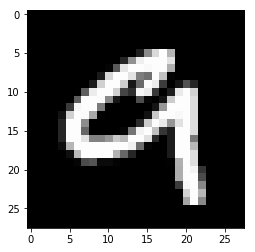

Actual: tensor(9)
Predicted: 9


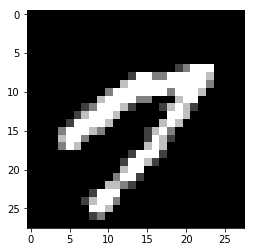

Actual: tensor(7)
Predicted: 7


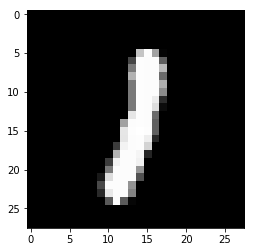

Actual: tensor(1)
Predicted: 1


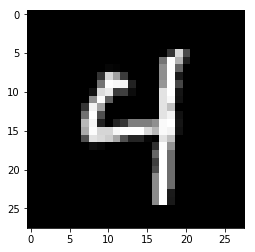

Actual: tensor(4)
Predicted: 4


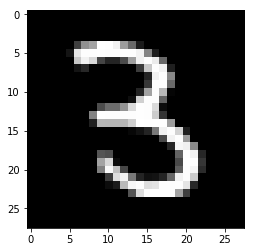

Actual: tensor(3)
Predicted: 3


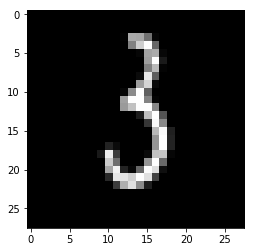

Actual: tensor(3)
Predicted: 2


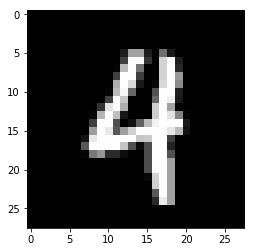

Actual: tensor(4)
Predicted: 4


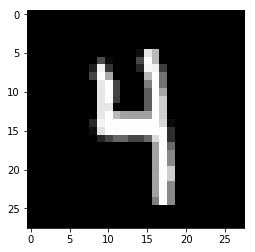

Actual: tensor(4)
Predicted: 4


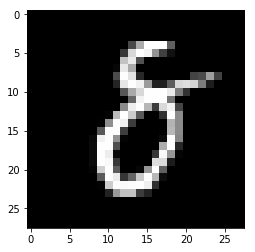

Actual: tensor(8)
Predicted: 5


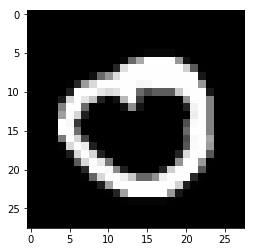

Actual: tensor(0)
Predicted: 0


In [16]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(images[i][0],cmap='gray')
    plt.show()
    print ("Actual:", labels[i])
    print ("Predicted:", preds[i])